In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D

Using TensorFlow backend.


In [0]:
#Kaggle Competition 
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

y_train = train['label']
x_train = train.drop(['label'], axis = 1)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9],
       [4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188]])

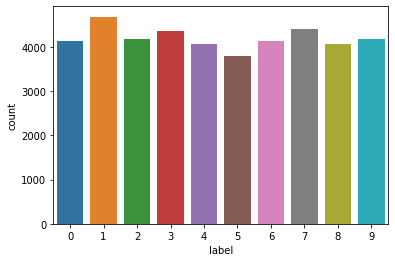

In [3]:
#label distribution
sns.countplot(y_train)
labels, counts = np.unique(y_train, return_counts=True)
np.array([labels, counts])

In [0]:
#normalize value for better performance
x_train = x_train / 255.0
test = test / 255.0

In [0]:
#reshaping to right format for Keras 
x_train = x_train.values.reshape(-1, 28, 28,1)
test = test.values.reshape(-1,28,28,1)

y_train = to_categorical(y_train, num_classes = 10)

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)


In [0]:
#data augmentation to prevent overfitting and gathering more data
datagen = ImageDataGenerator(zoom_range = 0.1, width_shift_range = 0.1,
                             rotation_range = 0.1, height_shift_range = 0.1)
datagen.fit(x_train)


In [8]:
#our basic cnn model

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Dropout(0.20))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [9]:
#fitting the model

history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = 32),
                              epochs = 1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





1182/1182 [==============================] - 17s 14ms/step - loss: 0.3472 - acc: 0.8907


In [10]:
#model validation
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true_classes = np.argmax(y_val, axis = 1)

accuracy_score(y_pred_classes, y_true_classes)

0.975

In [11]:
confusion_matrix(y_pred_classes, y_true_classes)

array([[404,   0,   0,   1,   0,   0,   2,   0,   1,   2],
       [  0, 465,   3,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1, 389,   0,   0,   0,   0,   2,   1,   0],
       [  0,   3,   5, 496,   0,   0,   0,   3,   0,   3],
       [  1,   0,   2,   0, 385,   0,   1,   1,   1,   1],
       [  1,   0,   0,   6,   0, 335,   2,   0,   2,   4],
       [  1,   2,   0,   0,   3,   1, 397,   0,   1,   0],
       [  0,   0,   9,   1,   0,   0,   0, 429,   1,   2],
       [  1,   0,  12,   2,   2,   2,   0,   1, 394,   3],
       [  0,   0,   0,   0,   7,   1,   0,   2,   2, 401]])

In [0]:
#predicting from test data
test_results = model.predict(test)
test_results_classes = np.argmax(test_results, axis = 1)

In [0]:
#creating CSV for submission
submission_kaggle = pd.DataFrame({'ImageId': range(1, 28001), 'Label': test_results_classes})
submission_kaggle.to_csv('kaggle_competition.csv', index=False)